# Priority Visualizations for Investment Opportunities

This notebook creates two visual summaries. The first is a bar chart that highlights the top 10 Community Areas with the highest overall investment opportunity. The second is a heatmap showing sector specific deficits for bars, gyms, shops, and schools. These visualizations help compare priority zones and understand how each neighborhood differs in its amenity gaps.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load ranking file
df = pd.read_csv("../datasets/final_opportunity_ranking.csv")

# Standardize case
df["ca_name"] = df["ca_name"].str.title()


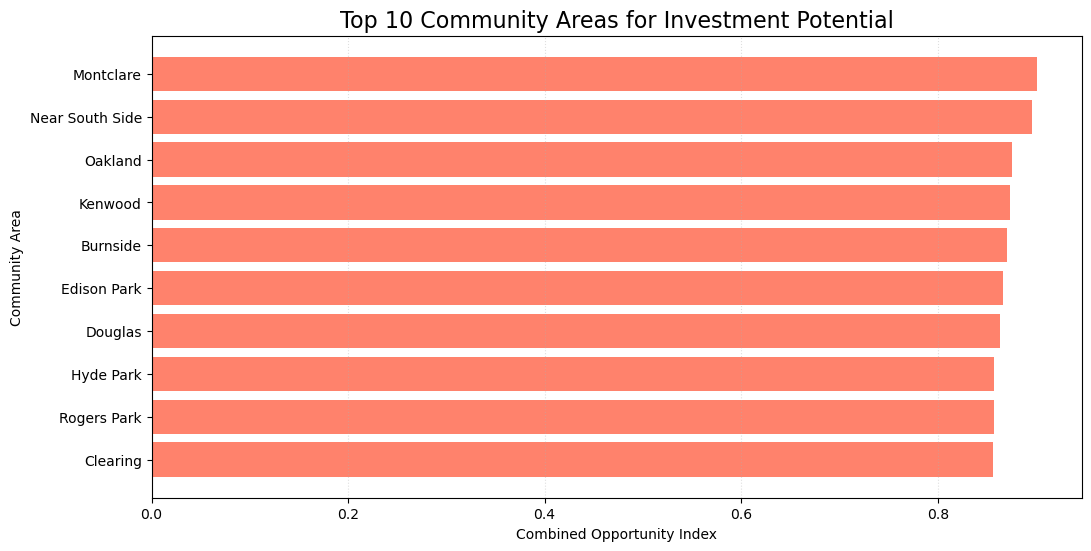

In [10]:
# Sort by overall investment need
top10 = df.sort_values("combined_opportunity_index", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(
    top10["ca_name"],
    top10["combined_opportunity_index"],
    color="tomato",
    alpha=0.8
)

plt.gca().invert_yaxis()  # highest value at top
plt.title("Top 10 Community Areas for Investment Potential", fontsize=16)
plt.xlabel("Combined Opportunity Index")
plt.ylabel("Community Area")
plt.grid(axis="x", linestyle=":", alpha=0.4)

plt.show()


In [11]:
top10

,ca_num,ca_name,bars_undersupply,gyms_undersupply,shops_undersupply,schools_undersupply,combined_opportunity_index,overall_rank
0,18,Montclare,0.909920,0.863508,1.000000,0.794859,0.901257,1
1,33,Near South Side,0.989558,1.000000,0.942857,0.422194,0.895911,2
2,36,Oakland,0.855144,0.800256,1.000000,0.860657,0.875719,3
3,39,Kenwood,0.920448,0.867391,1.000000,0.582744,0.873763,4
4,47,Burnside,0.822144,0.769373,1.000000,0.951002,0.870106,5
5,9,Edison Park,0.915426,0.827366,0.942857,0.717827,0.866226,6
6,35,Douglas,0.980511,0.908344,0.971429,0.356735,0.863024,7
7,41,Hyde Park,0.970646,0.896547,0.885714,0.507408,0.857698,8
8,1,Rogers Park,0.917429,0.927110,0.942857,0.452697,0.856980,9
9,64,Clearing,0.864231,0.817903,0.971429,0.728188,0.856726,10


In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Load combined dataset and geometry
# -----------------------------------------------------------

df = pd.read_csv("../datasets/combined_opportunity_index_by_CA.csv")
df["ca_name"] = df["ca_name"].str.upper().str.strip()

ca_url = "https://data.cityofchicago.org/resource/igwz-8jzy.geojson"
ca = gpd.read_file(ca_url).to_crs("EPSG:4326")
ca = ca.rename(columns={"area_numbe": "ca_num", "community": "ca_name"})
ca["ca_num"] = ca["ca_num"].astype(int)
ca["ca_name"] = ca["ca_name"].str.upper().str.strip()

# Merge for mapping
gdf = ca.merge(df, on=["ca_num", "ca_name"], how="left")


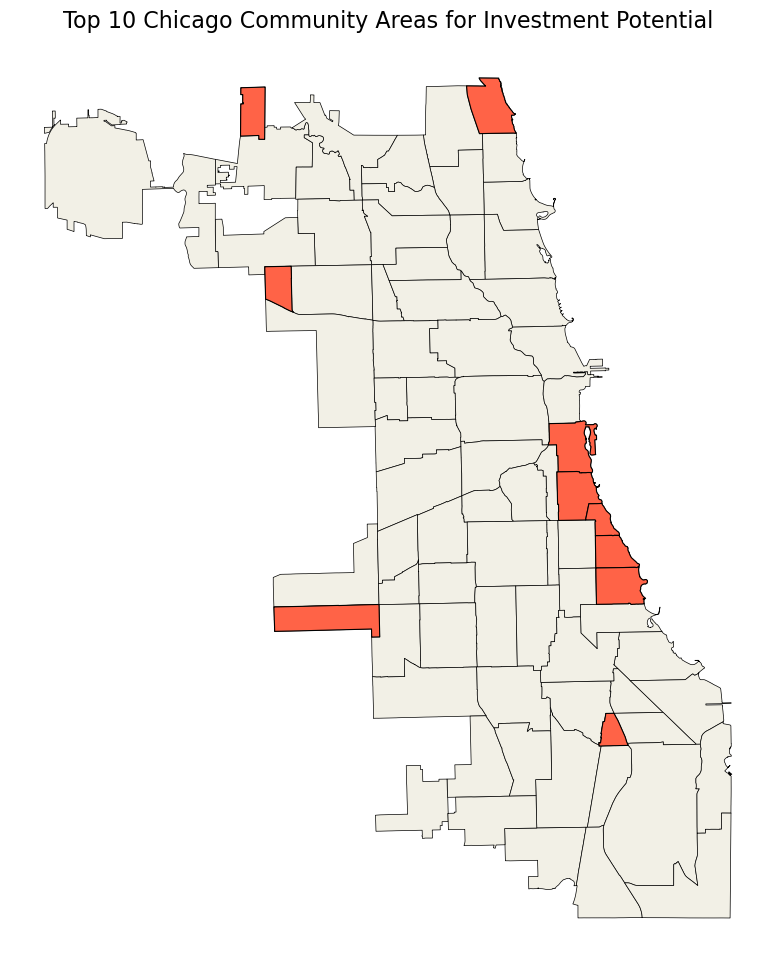

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Select top 10 CA names
top10 = df.sort_values("combined_opportunity_index", ascending=False).head(10)
top10_names = top10["ca_name"].tolist()

# Add a helper column to the GeoDataFrame
gdf["highlight"] = gdf["ca_name"].isin(top10_names)

# Plot
fig, ax = plt.subplots(figsize=(10, 12))

# Plot all CA boundaries
gdf.plot(
    ax=ax,
    color="#f2f0e6",   # light background for non highlighted areas
    edgecolor="black",
    linewidth=0.5
)

# Plot the top 10 in red
gdf[gdf["highlight"]].plot(
    ax=ax,
    color="tomato",
    edgecolor="black",
    linewidth=0.8
)

# Clean styling
ax.set_title("Top 10 Chicago Community Areas for Investment Potential", fontsize=16)
ax.set_axis_off()

plt.show()


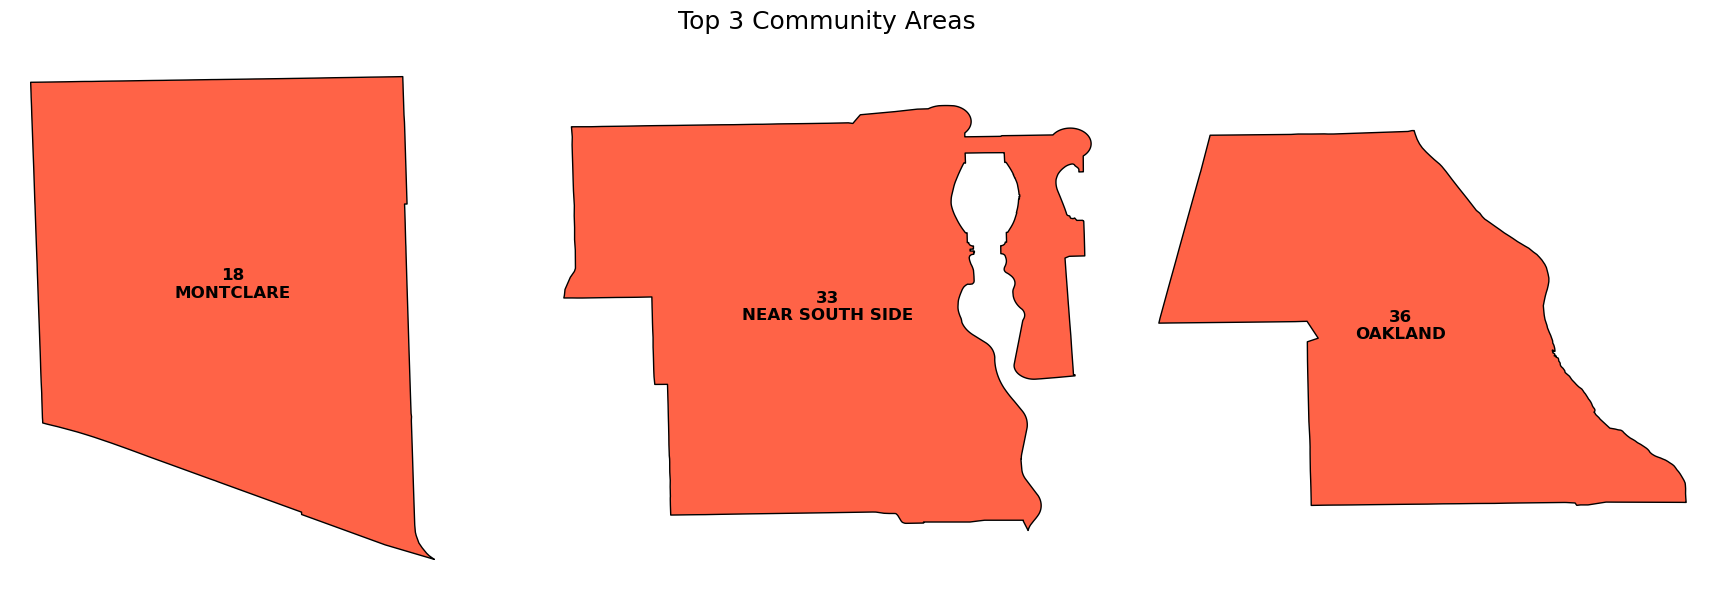

In [14]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Top 3 CA por índice
top3 = df.sort_values("combined_opportunity_index", ascending=False).head(3)
top3_names = top3["ca_name"].tolist()

# Extraemos geometrías
top3_gdf = gdf[gdf["ca_name"].isin(top3_names)].copy()

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (idx, row) in zip(axes, top3_gdf.iterrows()):
    
    # Extraer nombre y número
    ca_name = row["ca_name"]
    ca_num = row["area_num"] if "area_num" in row else row["ca_num"]
    
    # Plot de la forma
    gpd.GeoDataFrame([row]).plot(
        ax=ax,
        color="tomato",
        edgecolor="black",
        linewidth=1
    )
    
    # Poner texto dentro de la forma
    centroid = row.geometry.centroid
    ax.text(
        centroid.x, centroid.y,
        f"{ca_num}\n{ca_name}",
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold"
    )

    ax.set_axis_off()

plt.suptitle("Top 3 Community Areas", fontsize=18)
plt.tight_layout()
plt.show()


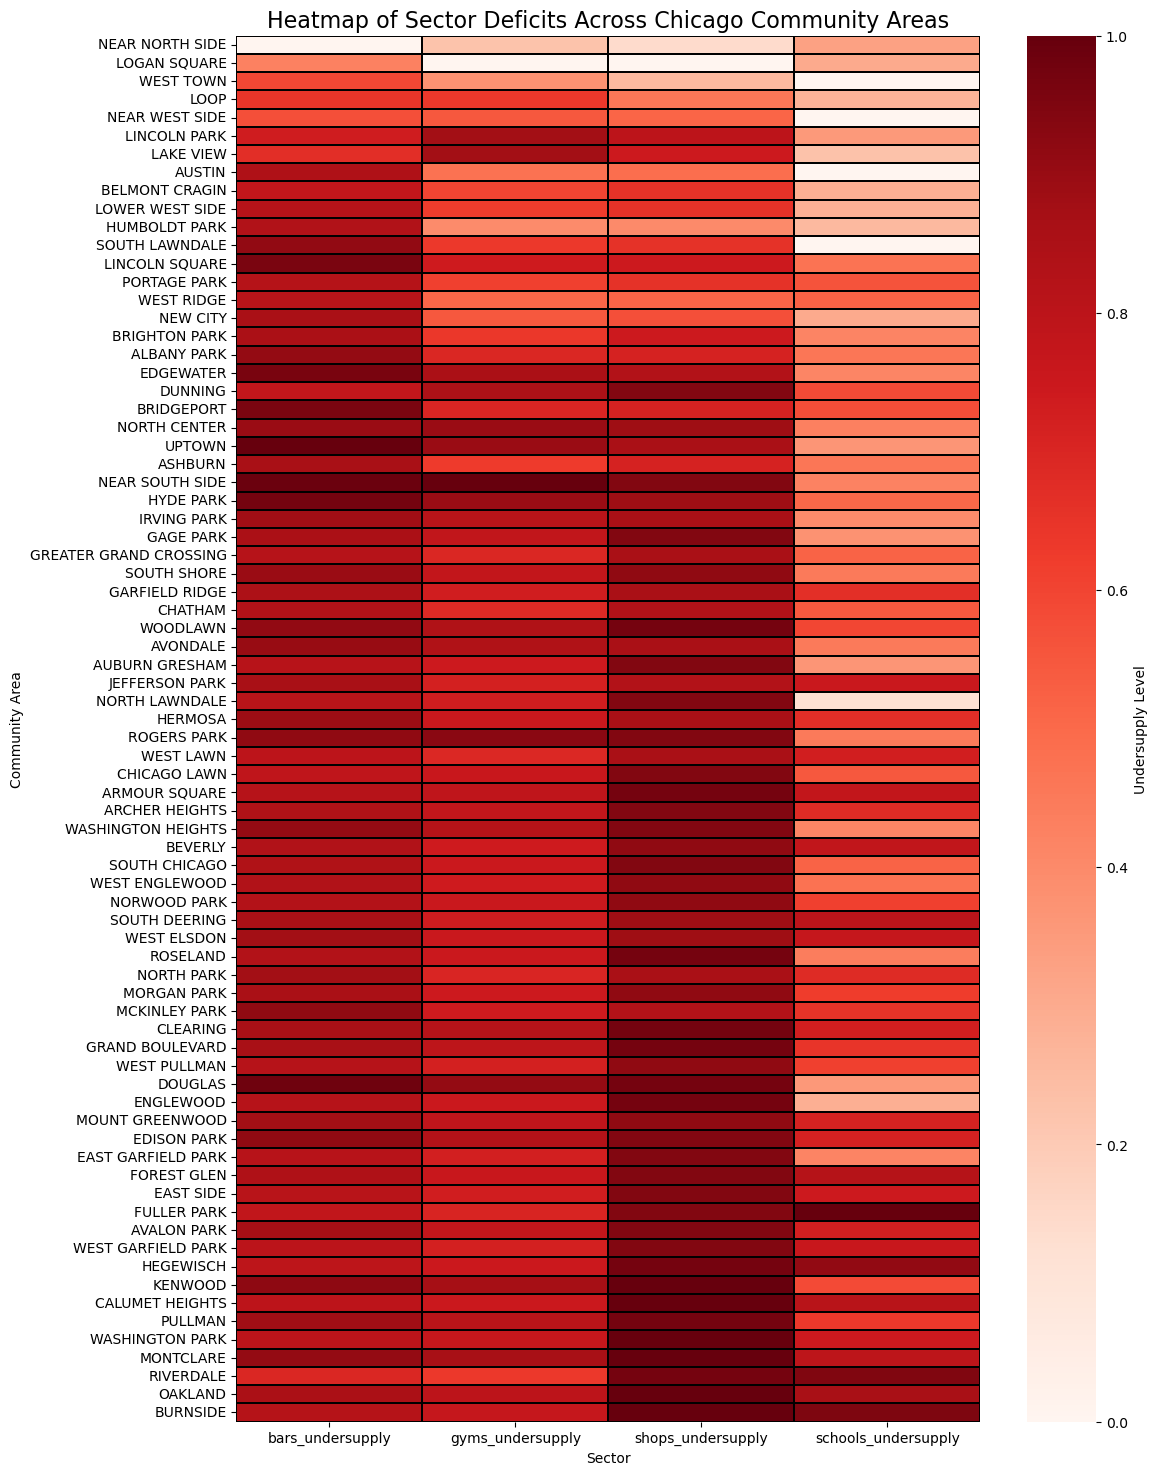

In [15]:
# Keep relevant columns
heatmap_df = df[
    [
        "ca_name",
        "bars_undersupply",
        "gyms_undersupply",
        "shops_undersupply",
        "schools_undersupply"
    ]
]

# Set CA names as index for heatmap readability
heatmap_df = heatmap_df.set_index("ca_name")

plt.figure(figsize=(12, 18))
sns.heatmap(
    heatmap_df,
    cmap="Reds",
    linewidths=0.3,
    linecolor="black",
    cbar_kws={"label": "Undersupply Level"}
)

plt.title("Heatmap of Sector Deficits Across Chicago Community Areas", fontsize=16)
plt.xlabel("Sector")
plt.ylabel("Community Area")

plt.show()
